<a href="https://colab.research.google.com/github/BiancaBb01/PMP-2024/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

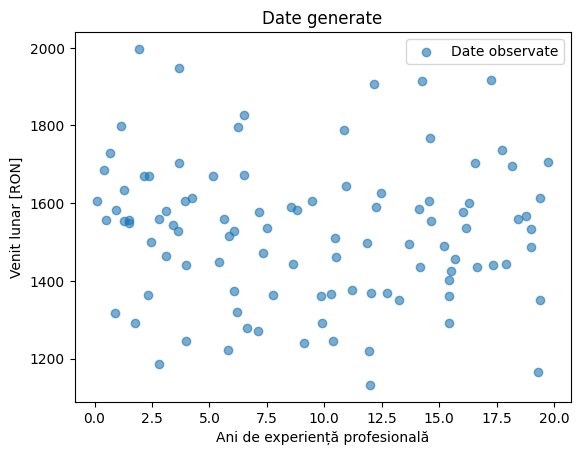

In [1]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

# Generarea datelor
np.random.seed(42)
n = 100
x = np.random.uniform(0, 20, n)
true_slope = 2.5
true_intercept = 1500
true_sigma = 200
y = true_slope * x + true_intercept + np.random.normal(0, true_sigma, n)

# Reprezentarea grafica
plt.scatter(x, y, alpha=0.6, label="Date observate")
plt.xlabel("Ani de experiență profesională")
plt.ylabel("Venit lunar [RON]")
plt.title("Date generate")
plt.legend()
plt.show()


Output()

Output()

               mean      sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
intercept  1541.805  32.022  1480.058   1602.637      0.719    0.508   
sigma       173.160  11.250   151.801    194.975      0.216    0.153   
slope        -1.971   2.829    -7.861      3.349      0.063    0.048   

           ess_bulk  ess_tail  r_hat  
intercept    1989.0    2173.0    1.0  
sigma        2699.0    2435.0    1.0  
slope        2043.0    2059.0    1.0  


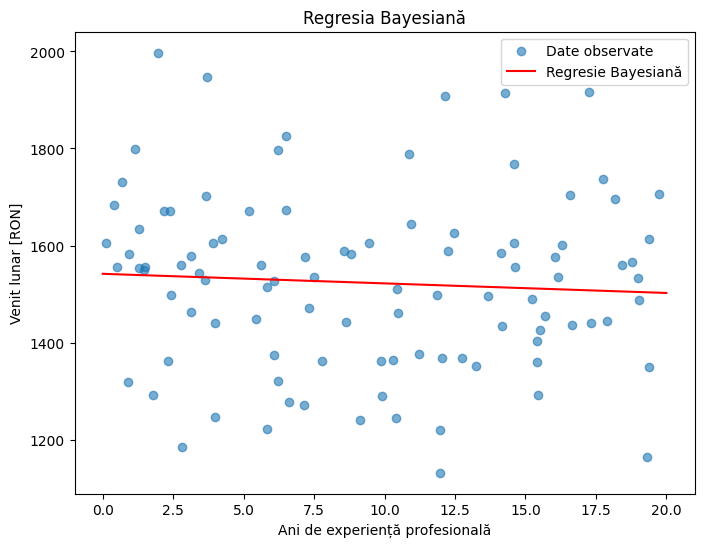

In [2]:
import arviz as az
# Definirea modelului Bayesian de regresie liniara
with pm.Model() as model:

    slope = pm.Normal("slope", mu=0, sigma=10)
    intercept = pm.Normal("intercept", mu=1500, sigma=500)
    sigma = pm.HalfNormal("sigma", sigma=50)

    mu = slope * x + intercept

    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

print(az.summary(trace, hdi_prob=0.95))

# Reprezentarea grafica
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, label="Date observate")
x_line = np.linspace(0, 20, 100)
y_line = trace.posterior["slope"].mean().item() * x_line + trace.posterior["intercept"].mean().item()
plt.plot(x_line, y_line, color="red", label="Regresie Bayesiană")
plt.xlabel("Ani de experiență profesională")
plt.ylabel("Venit lunar [RON]")
plt.title("Regresia Bayesiană")
plt.legend()
plt.show()
